In [1]:
import torch
from tqdm import tqdm

In [2]:
import os
import sys

sys.path.append(os.path.pardir)

In [3]:
from cpm_torch.CPM_Image import *
from cpm_torch.CPM import *

In [4]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPUを利用します: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CPUを利用します")

config = CPM_config(
    size = (16, 16),  # 画像サイズ
    l_A=1.0,  # 面積エネルギー項の係数λ_A
    l_L=0.0,  # 周囲長エネルギー項の係数λ_L
    A_0=8.0,  # 目標細胞面積 A_0
    L_0=8.0,  # 目標細胞周囲長 L_0
    T=1.0,  # 温度パラメータ T
)
print(config.__dict__)

GPUを利用します: NVIDIA H100 PCIe
{'size': (16, 16), 'dim': 2, 'height': 16, 'width': 16, 'depth': 1, 'l_A': 1.0, 'l_L': 0.0, 'A_0': 8.0, 'L_0': 8.0, 'T': 1.0}


### 初期条件

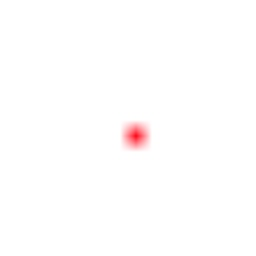

In [5]:
cpm = CPM(config, device)  # CPMのインスタンスを作成
cpm.add_cell(8, 8)
imshow_map(cpm.map_tensor)  # 初期状態を表示

### シュミレーション

ステップ:   0%|          | 0/10 [00:00<?, ?it/s]

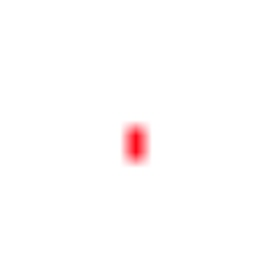

ステップ:  10%|█         | 1/10 [00:00<00:01,  7.18it/s]

面積カウント: tensor([254.,   2.], device='cuda:0')
周囲長カウント: tensor([6., 6.], device='cuda:0')
細胞数: 1


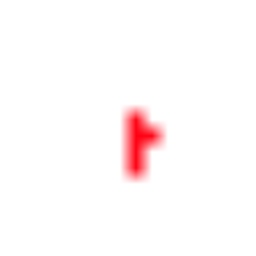

面積カウント: tensor([251.,   5.], device='cuda:0')
周囲長カウント: tensor([12., 12.], device='cuda:0')
細胞数: 1


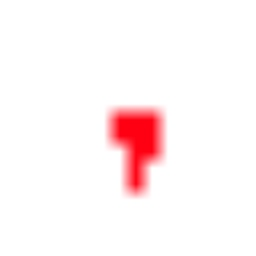

面積カウント: tensor([246.,  10.], device='cuda:0')
周囲長カウント: tensor([16., 16.], device='cuda:0')
細胞数: 1


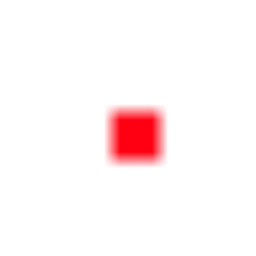

面積カウント: tensor([247.,   9.], device='cuda:0')
周囲長カウント: tensor([12., 12.], device='cuda:0')
細胞数: 1


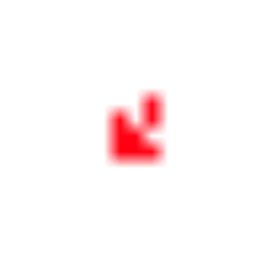

面積カウント: tensor([248.,   8.], device='cuda:0')
周囲長カウント: tensor([18., 18.], device='cuda:0')
細胞数: 1


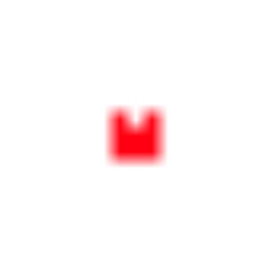

面積カウント: tensor([248.,   8.], device='cuda:0')
周囲長カウント: tensor([14., 14.], device='cuda:0')
細胞数: 1


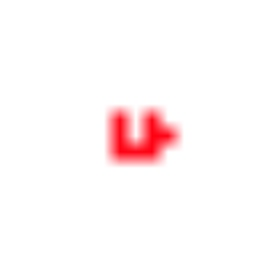

面積カウント: tensor([248.,   8.], device='cuda:0')
周囲長カウント: tensor([18., 18.], device='cuda:0')
細胞数: 1


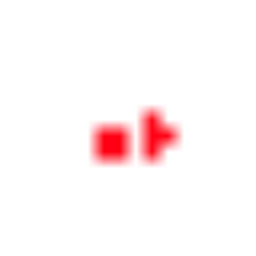

面積カウント: tensor([248.,   8.], device='cuda:0')
周囲長カウント: tensor([18., 18.], device='cuda:0')
細胞数: 1


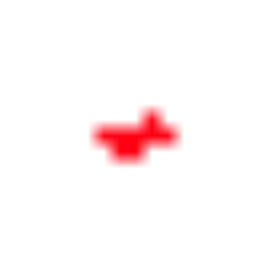

面積カウント: tensor([248.,   8.], device='cuda:0')
周囲長カウント: tensor([16., 16.], device='cuda:0')
細胞数: 1


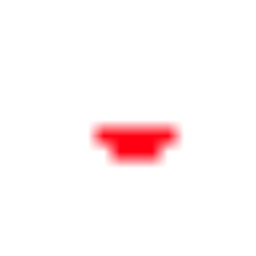

ステップ: 100%|██████████| 10/10 [00:00<00:00, 41.53it/s]

面積カウント: tensor([248.,   8.], device='cuda:0')
周囲長カウント: tensor([14., 14.], device='cuda:0')
細胞数: 1
警告: クローズ時にフェードバッファのサイズが一致しません。intro=10, outro=0, fade_len=10


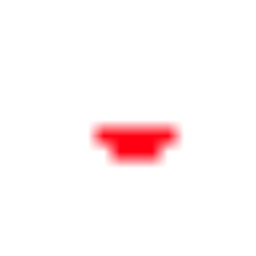

In [6]:

step = 10      # シミュレーションのエポック数
mcs_per_step = 1 # 1エポックあたりのCPMステップ数
diffusion_steps = 5 # 1 CPMステップあたりの拡散ステップ数

# オプション: 動画記録用ライターの初期化
video_filename = '../results/cpm_torch_jp.mp4'
writer = LoopWriter(filename=video_filename, fps=10) # ループ動画ライター

# --- シミュレーション実行 ---
for i in tqdm(range(step), desc="ステップ"):
    for k in range(mcs_per_step):
        cpm.cpm_mcs_step()
        
    imshow_map(cpm.map_tensor)  # 各エポックの状態を表示
    cpm.print_cpm_bins()  # 各細胞の面積と周囲長を表示
    
    # --- 動画フレーム追加 ---
    frame_rgb = map_tensor_to_rgb(cpm.map_tensor)
    writer.add(frame_rgb)

writer.close()
imshow_map(cpm.map_tensor)